<a href="https://colab.research.google.com/github/cutiips/R/blob/main/Master's_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# options(warn = -1)

# Station: NEU (Neuchâtel), precipitation dataset rre150d0
Daily total precipitation, from 6 UTC to 6 UTC (next day)

Temporal coverage: 31.12.1863 - 31.12.2023

In [1]:
# Packages for data processing
suppressMessages({
    install.packages("dplyr")
    install.packages("ggplot2")
    install.packages("zoo")

    library(dplyr)
    library(ggplot2)
    library(zoo)
})

# Correct reading of the file with separator ’;’
url <- "https://raw.githubusercontent.com/cutiips/R/main/NEU_rre150d0.txt"
NEU_P <- read.table(url, sep = ";", header = FALSE,
                    col.names = c("station", "date", "precip"))

# Date conversion
NEU_P$date <- as.Date(as.character(NEU_P$date), format = "%Y%m%d")
NEU_P$year <- format(NEU_P$date, "%Y")
NEU_P$month <- format(NEU_P$date, "%m")

# Check for missing values
sum(is.na(NEU_P))


[1] 3

# R10mm

Annual count of days with precipitation ≥ 10mm


Call:
lm(formula = Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.385  -9.492   0.354   9.116  34.785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 126.94993   46.75552   2.715  0.00736 **
Year         -0.01411    0.02405  -0.587  0.55814   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.05 on 158 degrees of freedom
Multiple R-squared:  0.002175,	Adjusted R-squared:  -0.00414 
F-statistic: 0.3444 on 1 and 158 DF,  p-value: 0.5581


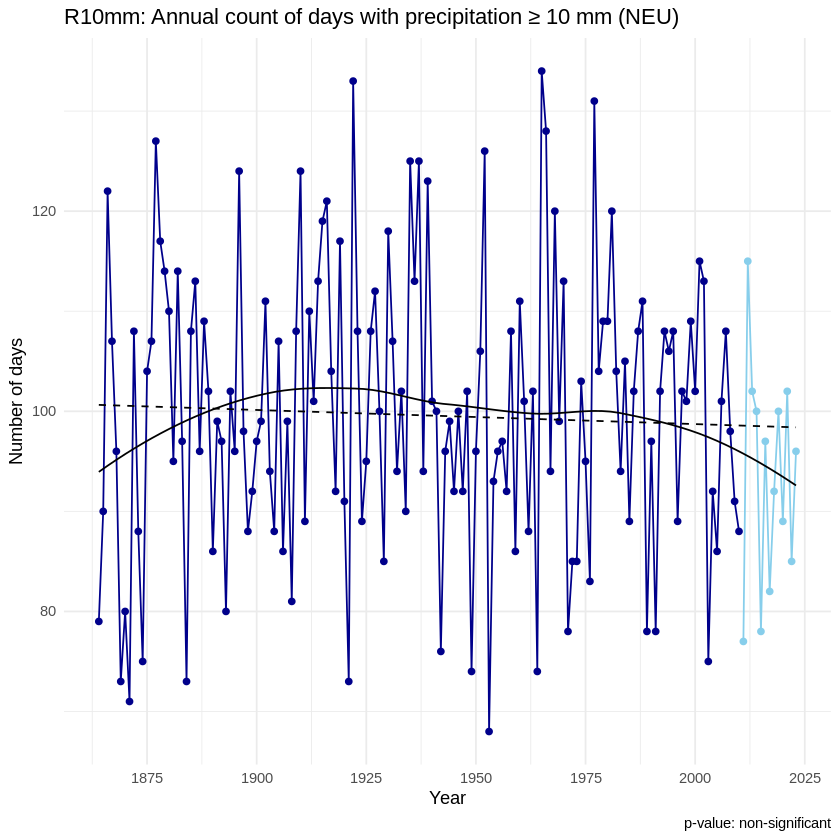

In [3]:
R10mm_days_NEU <- NEU_P[NEU_P$precip >= 10, ]
R10mm_summary_NEU <- aggregate(R10mm_days_NEU$precip,
  by = list(Year = R10mm_days_NEU$year), FUN = length)
colnames(R10mm_summary_NEU)[2] <- "Count_R10mm_NEU"
R10mm_summary_NEU$Year <- as.numeric(R10mm_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_R10mm_NEU <- lm(Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)
summary(model_R10mm_NEU)

# Data homogenization period (NEU) : 1864 to 2010
R10mm_summary_NEU$Dataset <- ifelse(R10mm_summary_NEU$Year <= 2010,
                                    "homogenized","non-homogenized")
R10mm_homog_NEU <- R10mm_summary_NEU[R10mm_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
suppressMessages(
  invisible(
    print(
    ggplot(R10mm_summary_NEU, aes(x = Year, y = Count_R10mm_NEU)) +
    geom_line(aes(color = Dataset), size = 0.5) +
    geom_point(aes(color = Dataset)) +
    geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
    geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
    labs(title = "R10mm: Annual count of days with precipitation ≥ 10 mm (NEU)",
         x = "Year", y = "Number of days",
         caption = "p-value: non-significant") +
    scale_y_continuous() +
    scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
    scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
    theme_minimal() +
    theme(legend.position = "none")
    )
  )
)

# Summary statistics (homogenized data only)
  #Mean
mean_R10mm_homog_NEU <- mean(R10mm_homog_NEU$Count_R10mm_NEU, na.rm = TRUE)

  #Usual range
range_R10mm_homog_NEU <- quantile(R10mm_homog_NEU$Count_R10mm,
  probs = c(0.05, 0.95), na.rm = TRUE)

# R95pTOT
Total annual precipitation from days exceeding the 95th percentile,

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period



Call:
lm(formula = Total_R95p_NEU ~ Year, data = R95p_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-277.75  -81.27  -17.48   65.71  346.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 819.6758   429.6377   1.908   0.0582 .
Year         -0.1521     0.2210  -0.688   0.4923  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 129.1 on 158 degrees of freedom
Multiple R-squared:  0.002989,	Adjusted R-squared:  -0.003321 
F-statistic: 0.4737 on 1 and 158 DF,  p-value: 0.4923


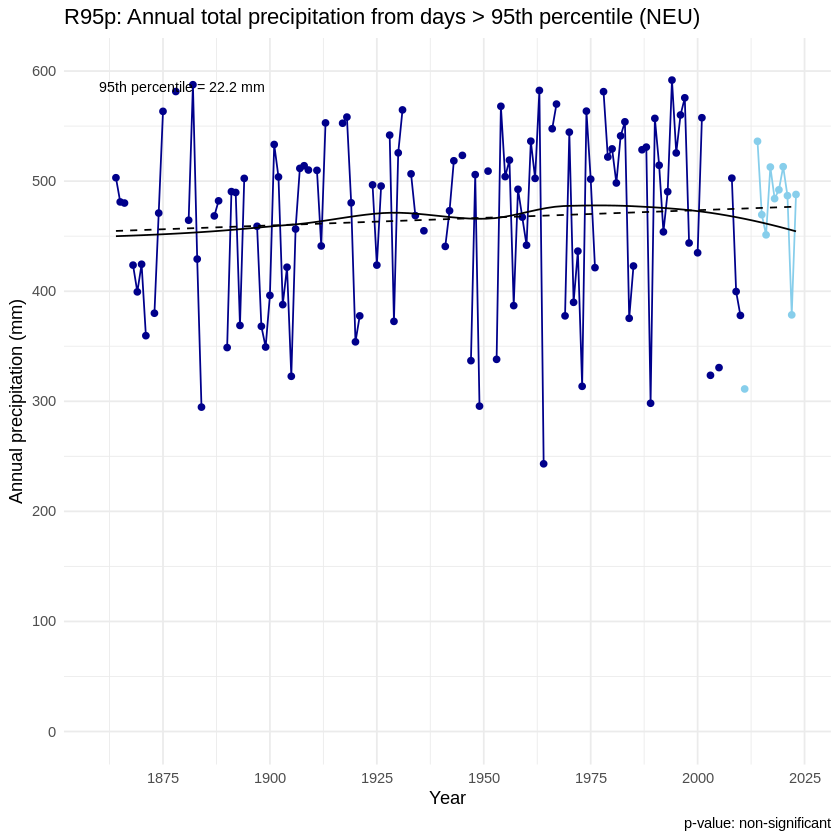

In [ ]:

# 95th percentile for wet days (1961–1990)
NEU_reference_period <- NEU_P[NEU_P$date >= as.Date("1961-01-01") & NEU_P$date <= as.Date("1990-12-31") &
  NEU_P$precip >= 1, ]
NEU_reference_period$precip <- as.numeric(as.character(NEU_reference_period$precip))
threshold_95_NEU <- quantile(NEU_reference_period$precip, 0.95, na.rm = TRUE)

# Days above the 95th percentile, and compute annual total
R95p_summary_NEU <- NEU_P[NEU_P$precip >= 1 & NEU_P$precip > threshold_95_NEU, ]
R95p_summary_NEU$precip <- as.numeric(as.character(R95p_summary_NEU$precip))
R95p_summary_NEU <- aggregate(R95p_summary_NEU$precip,
  by = list(Year = R95p_summary_NEU$year),FUN = sum, na.rm = TRUE)
colnames(R95p_summary_NEU)[2] <- "Total_R95p_NEU"
R95p_summary_NEU$Year <- as.numeric(R95p_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_R95p_NEU <- lm(Total_R95p_NEU ~ Year, data = R95p_summary_NEU)
summary(model_R95p_NEU)

# Data homogenization period (NEU) : 1864 to 2010
R95p_summary_NEU$Dataset <- ifelse(R95p_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
R95p_homog_NEU <- R95p_summary_NEU[R95p_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
suppressMessages(
  invisible(
    print(
        ggplot(R95p_summary_NEU, aes(x = Year, y = Total_R95p_NEU)) +
          geom_line(aes(color = Dataset), size = 0.5) +
          geom_point(aes(color = Dataset)) +
          geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
          geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
          labs(title = "R95p: Annual total precipitation from days > 95th percentile (NEU)",
          x = "Year", y = "Annual precipitation (mm)", caption = "p-value: non-significant") +
          scale_y_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 100)) +
          scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
          scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
          theme_minimal() + theme(legend.position = "none") +
          annotate("text", x = 1860, y = 590, label = "95th percentile = 22.2 mm", hjust = 0, vjust = 1, size = 3, color = "black")
    )
  )
)

# Summary statistics (homogenized data only)
  # Mean
mean_R95p_homog_NEU <- mean(R95p_homog_NEU$Total_R95p_NEU, na.rm = TRUE)

 # Range
range_R95p_homog_NEU <- quantile(R95p_homog_NEU$Total_R95p_NEU,
  probs = c(0.05, 0.95), na.rm = TRUE)

# Complementary approach : R95p days
Annual count of days with precipitation > 95th percentile

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period


Call:
lm(formula = Days_R95p_NEU ~ Year, data = R95p_days_summary_NEU)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.5294  -5.4285  -0.6536   6.3815  25.3708 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 92.53012   31.99304   2.892  0.00437 **
Year        -0.01699    0.01646  -1.032  0.30359   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.615 on 158 degrees of freedom
Multiple R-squared:  0.006697,	Adjusted R-squared:  0.0004104 
F-statistic: 1.065 on 1 and 158 DF,  p-value: 0.3036


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


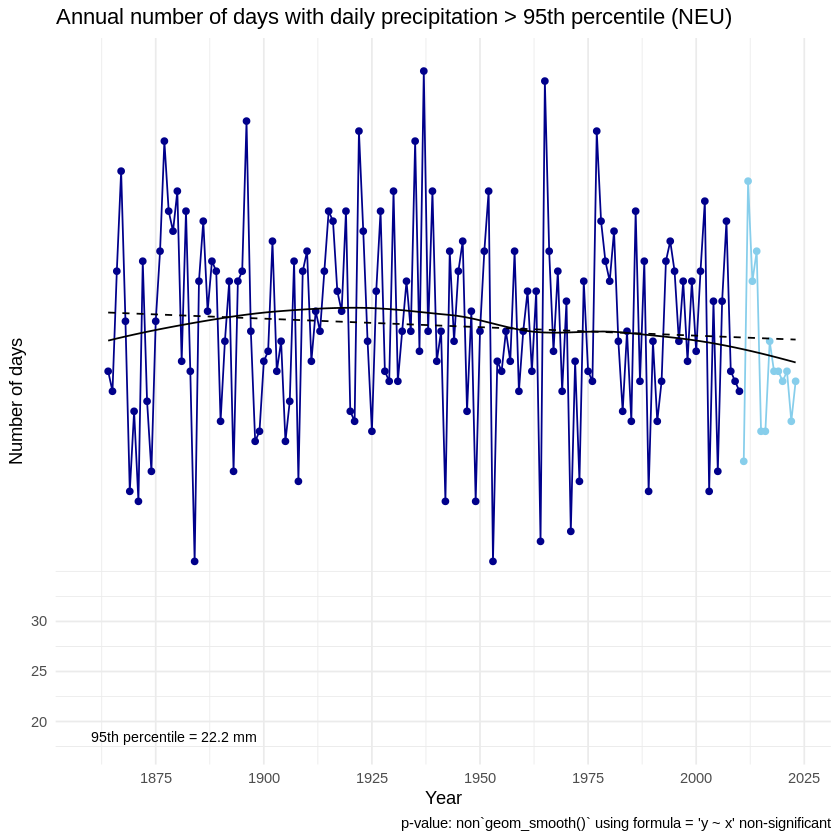

In [4]:
# 95th percentile for wet days (1961–1990)
NEU_reference_period <- NEU_P[NEU_P$date >= as.Date("1961-01-01") &
                              NEU_P$date <= as.Date("1990-12-31") &
                              NEU_P$precip >= 1, ]
NEU_reference_period$precip <- as.numeric(as.character(NEU_reference_period$precip))
threshold_95_days_NEU <- quantile(NEU_reference_period$precip, 0.95, na.rm = TRUE)


# Number of days per year exceeding this threshold
R95p_days_summary_NEU <- NEU_P[NEU_P$precip > threshold_95_days_NEU, ]
R95p_days_summary_NEU <- aggregate(R95p_days_summary_NEU$precip,
  by = list(Year = R95p_days_summary_NEU$year),FUN = length)
colnames(R95p_days_summary_NEU)[2] <- "Days_R95p_NEU"
R95p_days_summary_NEU$Year <- as.numeric(R95p_days_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_R95p_days_NEU <- lm(Days_R95p_NEU ~ Year, data = R95p_days_summary_NEU)
summary(model_R95p_days_NEU)

# Data homogenization period (NEU) : 1864 to 2010
R95p_days_summary_NEU$Dataset <- ifelse(R95p_days_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
R95p_days_homog_NEU <- R95p_days_summary_NEU[R95p_days_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
ggplot(R95p_days_summary_NEU, aes(x = Year, y = Days_R95p_NEU)) +
  geom_line(aes(color = Dataset), linewidth = 0.5) +  # Remplacer size par linewidth
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Annual number of days with daily precipitation > 95th percentile (NEU)",
       x = "Year", y = "Number of days",
       caption = "p-value: non`geom_smooth()` using formula = 'y ~ x' non-significant") +
  scale_y_continuous(breaks = seq(-30, 30, by = 5)) +  # Ajuster la plage
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1860, y = 19,
           label = paste0("95th percentile = ", round(threshold_95_days_NEU, 1), " mm"),
           hjust = 0, vjust = 1, size = 3, color = "black")

# Summary statistics (homogenized data only)
  # Mean
mean_R95p_days_homog_NEU <- mean(R95p_days_homog_NEU$Days_R95p_NEU, na.rm = TRUE)

  # Range
range_R95p_days_homog_NEU <- quantile(R95p_days_homog_NEU$Days_R95p_NEU,
 probs = c(0.05, 0.95),na.rm = TRUE)

# Rx1day
Annual maximum of daily precipitation


Call:
lm(formula = Yearly_Max_Rx1day_NEU ~ Year, data = Rx1day_summary_NEU)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88371 -0.10738  0.07114  0.18961  0.25351 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.6263477  0.7951399  10.849   <2e-16 ***
Year        0.0005473  0.0004090   1.338    0.183    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.239 on 158 degrees of freedom
Multiple R-squared:  0.0112,	Adjusted R-squared:  0.004947 
F-statistic:  1.79 on 1 and 158 DF,  p-value: 0.1828


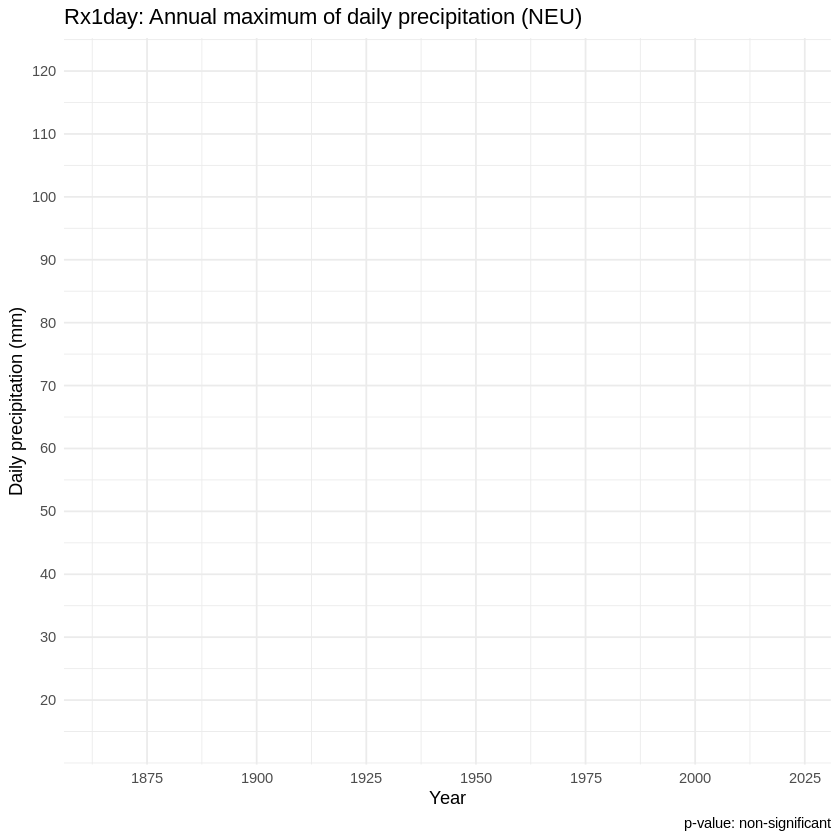

In [ ]:
Rx1day_summary_NEU <- aggregate(NEU_P$precip,
  by = list(Year = NEU_P$year), FUN = max, na.rm = TRUE)
colnames(Rx1day_summary_NEU)[2] <- "Yearly_Max_Rx1day_NEU"

# 🔧 conversion en numérique obligatoire
Rx1day_summary_NEU$Yearly_Max_Rx1day_NEU <- as.numeric(as.character(Rx1day_summary_NEU$Yearly_Max_Rx1day_NEU))
Rx1day_summary_NEU$Year <- as.numeric(Rx1day_summary_NEU$Year)

# Linear trend analysis (based on all available data)
model_Rx1day_NEU <- lm(Yearly_Max_Rx1day_NEU ~ Year, data = Rx1day_summary_NEU)
summary(model_Rx1day_NEU)

# Data homogenization period (NEU) : 1864 to 2010
Rx1day_summary_NEU$Dataset <- ifelse(Rx1day_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
Rx1day_homog_NEU <- Rx1day_summary_NEU[Rx1day_summary_NEU$Dataset == "homogenized", ]

# 🔧 conversion en numérique obligatoire aussi ici
Rx1day_homog_NEU$Yearly_Max_Rx1day_NEU <- as.numeric(as.character(Rx1day_homog_NEU$Yearly_Max_Rx1day_NEU))

# Graph with data homogenization period
suppressMessages(invisible(print(
  ggplot(Rx1day_summary_NEU, aes(x = Year, y = Yearly_Max_Rx1day_NEU)) +
    geom_line(aes(color = Dataset), size = 0.5) +
    geom_point(aes(color = Dataset)) +
    geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
    geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
    labs(title = "Rx1day: Annual maximum of daily precipitation (NEU)",
         x = "Year", y = "Daily precipitation (mm)",
         caption = "p-value: non-significant") +
    scale_y_continuous(limits = c(15, 120), breaks = seq(20, 120, by = 10)) +
    scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
    scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
    theme_minimal() +
    theme(legend.position = "none")
)))

# Summary statistics (homogenized data only)
mean_Rx1day_homog_NEU <- mean(Rx1day_homog_NEU$Yearly_Max_Rx1day_NEU, na.rm = TRUE)

range_Rx1day_homog_NEU <- quantile(Rx1day_homog_NEU$Yearly_Max_Rx1day_NEU,
                                   probs = c(0.05, 0.95), na.rm = TRUE)


# CWD
Maximum number of consecutive wet days


Call:
lm(formula = Max_CWD_NEU ~ Year, data = CWD_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3424 -1.3268 -0.3144  0.9664  5.7415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 5.841274   6.851376   0.853    0.395
Year        0.001272   0.003524   0.361    0.719

Residual standard error: 2.059 on 158 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0008232,	Adjusted R-squared:  -0.005501 
F-statistic: 0.1302 on 1 and 158 DF,  p-value: 0.7187


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


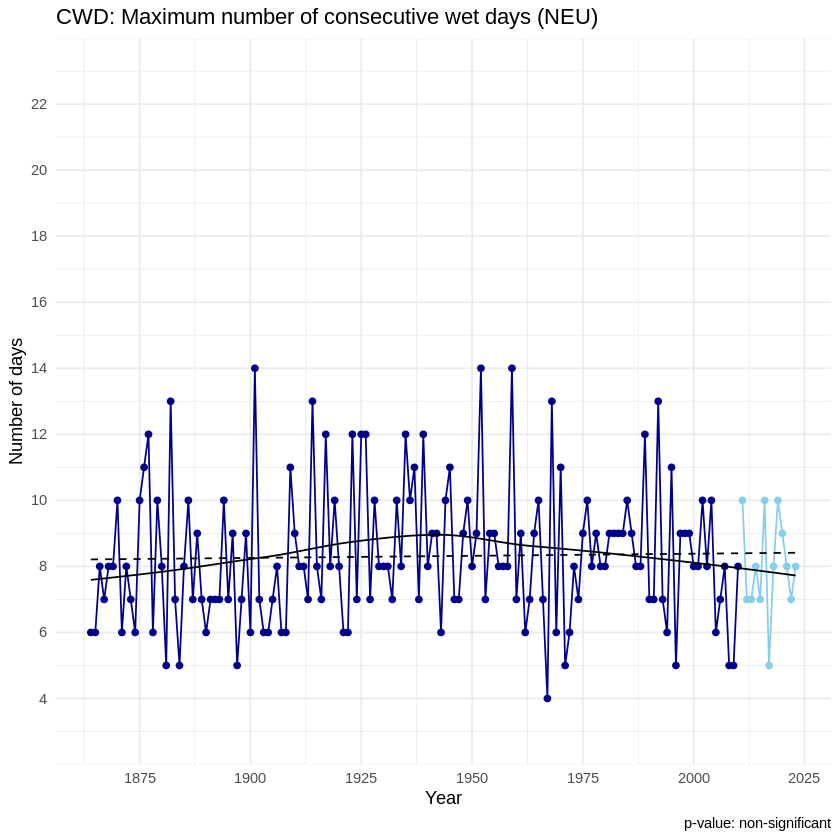

In [ ]:
# Binary wet-day indicator
NEU_P$Wet_Day <- ifelse(NEU_P$precip >= 1, 1, 0)

# Create the loop to compute the maximum wet spell length
CWD_summary_NEU <- data.frame(Year = unique(NEU_P$year), Max_CWD_NEU = NA)

for (i in seq_along(CWD_summary_NEU$Year))
  {year_data <- NEU_P[NEU_P$year == CWD_summary_NEU$Year[i], ]
  rle_wet <- rle(year_data$Wet_Day)
  CWD_summary_NEU$Max_CWD_NEU[i] <- if (any(rle_wet$values == 1, na.rm = TRUE))
  {max(rle_wet$lengths[rle_wet$values == 1], na.rm = TRUE)}
  else
  {0}}
CWD_summary_NEU$Year <- as.numeric(CWD_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_CWD_NEU <- lm(Max_CWD_NEU ~ Year, data = CWD_summary_NEU)
summary(model_CWD_NEU)

# Data homogenization period (NEU) : 1864 to 2010
CWD_summary_NEU$Dataset <- ifelse(CWD_summary_NEU$Year <= 2010,
  "homogenized","non-homogenized")
CWD_homog_NEU <- CWD_summary_NEU[CWD_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
ggplot(CWD_summary_NEU, aes(x = Year, y = Max_CWD_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "CWD: Maximum number of consecutive wet days (NEU)",
  x = "Year",y = "Number of days",caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(3, 23), breaks = seq(4, 23, by = 2)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

# Summary statistics (homogenized data only)
  # Mean
mean_CWD_homog_NEU <- mean(CWD_homog_NEU$Max_CWD_NEU, na.rm = TRUE)

  # Range
range_CWD_homog_NEU <- quantile(CWD_homog_NEU$Max_CWD_NEU,
  probs = c(0.05, 0.95),  na.rm = TRUE)